In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import os


datadir = './datos/'

# Ejercicios de transformación de datos

En las siguientes secciones del block de notas se plantean ejercicios relacionados con las transformaciones de datos vistas en clase hasta ahora. Cada sección contiene un «esqueleto» de código que debe ser completado para solucionar las cuestiones planteadas en los respectivos encabezados, junto con un enlace a la documentación correspondiente de [scikit-learn](https://scikit-learn.org).

En general se trata de preparar los datos, entrenar un modelo y observar y comentar los resultados obtenidos, haciendo en algunos casos, algunas comparativas.

**Importante**: recuerda que para evitar filtración de datos (data leaking) hay que calcular los parámetros de las transformaciones (fit) usando únicamente el conjunto de entrenamiento; posteriormente se aplican (transform) tanto al conjunto de entrenamiento como al de test.

## Codificación categórico $\rightarrow$ numérico

### One hot encoder

[Documentación en scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=onehotencoder#sklearn.preprocessing.OneHotEncoder)

* dataset: *breast-cancer.csv*
* modelo: regresión logística
* medida de rendimiento: `accuracy_score`
* `OneHotEncoder`
* `LabelEncoder`

Prueba a usar codificación 1 a k y codificación 1 a k-1 (siendo k el número de categorías) y comenta los resultados.

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

Creamos una clase que nos permita cargar los datasets

In [163]:
class DataSetLoader:
    """
    Clase que permite cargar los datasets de la carpeta indicada por el parámetro root
    """
    
    def __init__(self, root):
        """
        Constructor de la clase DataSetLoader

        :param str root: ruta de la carpeta que contiene los datasets
        """
        
        self.root = root
        self.datasets = self.get_names()

    def get_names(self):
        """
        Función que obtiene los nombres de los datasets de la carpeta
        indicada por el campo de clase root.
        
        :return: lista de nombres de los datasets
        """

        return [file for file in os.listdir(self.root)if file.endswith('.csv')]

    def load_dataset(self, dataset, h=None):
        """
        Función que carga un dataset en un DataFrame de pandas

        :param str dataset: nombre del dataset a cargar
        :param int h: número de fila que contiene los nombres de las columnas
        :return: DataFrame con los datos del dataset
        """

        dataset = pd.read_csv('./datos/' + self.datasets[dataset], header=h)
        return dataset

Cargamos el dataset

In [164]:
# load the dataset
loader = DataSetLoader(datadir)
dataset = loader.load_dataset(0)

Y modificamos el dataset cambiando los valores faltantes por la moda de cada columna

In [165]:
dataset.isna().sum()

0    0
1    0
2    0
3    0
4    8
5    0
6    0
7    1
8    0
9    0
dtype: int64

In [166]:
# fillna with the mode of each column
dataset = dataset.fillna(dataset.mode().iloc[0])

In [167]:
data = dataset.values

# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)

### *One Hot Encoder*

Comenzamos separando los datos en train y test

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

Entrenamos nuestro one hot encoder y transformamos los datos, entrenando únicamente los datos de train para evitar filtración de datos.

In [169]:
# One hot encoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe.fit(X_train)
X_train_enc = ohe.transform(X_train)
X_test_enc = ohe.transform(X_test)

c:\Users\carde\.conda\envs\aedv\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [170]:
X_train_enc.shape, X_train.shape

((200, 40), (200, 9))

Como podemos observar, el resultado de la transformación tiene 32 columnas de más, para poder así representar toda la información de los datos de forma binaria

A continuación, creamos y entrenamos un encoder para las etiquetas

In [171]:
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

In [172]:
df_train = pd.DataFrame(X_train)
df_train['target'] = y_train_enc
df_train

,0,1,2,3,4,5,6,7,8,target
0,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no',1
1,'50-59','ge40','30-34','0-2','no','1','right','left_low','no',0
2,'50-59','ge40','35-39','0-2','no','2','left','left_up','no',0
3,'40-49','premeno','25-29','0-2','no','1','left','right_low','no',0
4,'30-39','premeno','20-24','3-5','no','2','right','central','no',0
...,...,...,...,...,...,...,...,...,...,...
195,'60-69','ge40','20-24','3-5','no','2','left','left_low','yes',1
196,'60-69','ge40','15-19','0-2','no','2','left','left_up','yes',0
197,'60-69','ge40','15-19','0-2','no','2','right','left_up','no',0
198,'30-39','premeno','20-24','0-2','no','2','left','right_low','no',0


Si mostramos los datos transformados

In [173]:
cat = []
for c in ohe.categories_:
    cat.extend(c)

df_train = pd.DataFrame(X_train_enc)
df_train['target'] = y_train_enc
df_train.columns = cat + ['target']
df_train

,'20-29','30-39','40-49','50-59','60-69','70-79','ge40','lt40','premeno','0-4',...,'left','right','central','left_low','left_up','right_low','right_up','no','yes',target
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
196,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
197,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
198,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0


A continuación, entrenamos un modelo de regresión logística con los datos transformados y comprobamos su rendimiento

In [174]:
logistic_regressor_ohe = LogisticRegression()
logistic_regressor_ohe.fit(X_train_enc, y_train_enc)
y_pred_ohe = logistic_regressor_ohe.predict(X_test_enc)

accuracy = accuracy_score(y_test_enc, y_pred_ohe)

print('Accuracy: {:.2f}%'.format(accuracy*100))

Accuracy: 68.60%


### *No redundant One Hot Enconding*

Resulta que en toda transformación one hot encoding de una variable categórica, una de las columnas resultantes es redundante, ya que podemos obtener el valor de la misma a partir de las demás. Por lo tanto, podemos entrenar un modelo de regresión logística sin dicha columna, y obtener los mismos resultados o incluso mejores. Para ello, basta con repetir el proceso anterior, pero indicando que queremos que el encoder no sea redundante con el parámetro `drop='first'` de la clase `OneHotEncoder`.

In [175]:
# one hot enconder drop first
ohe_nr = OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first')
ohe_nr.fit(X_train)
X_train_enc_nr = ohe_nr.transform(X_train)
X_test_enc_nr = ohe_nr.transform(X_test)

c:\Users\carde\.conda\envs\aedv\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\carde\.conda\envs\aedv\lib\site-packages\sklearn\preprocessing\_encoders.py:182: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Obteniendo el siguiente resultado

In [176]:
cat = []
for c in ohe.categories_:
    cat.extend(c[1:])

df_train_nr = pd.DataFrame(X_train_enc_nr)
df_train_nr['target'] = y_train_enc
df_train_nr.columns = cat + ['target']
df_train_nr

,'30-39','40-49','50-59','60-69','70-79','lt40','premeno','10-14','15-19','20-24',...,'yes','2','3','right','left_low','left_up','right_low','right_up','yes',target
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
196,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
197,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
198,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


Como podemos apreciar, el valor '20-29' es el que se ha eliminado, ya que podemos obtener su valor a partir de las demás columnas. Así, cuando el resto de rango de edades sean 0, la columna '20-29' será 1, y 'viceversa'.

Si volvemos a entrenar un modelo de regresión logística con los datos transformados sin la columna redundante, obtenemos el siguiente resultado

In [177]:
logistic_regressor_ohe = LogisticRegression()
logistic_regressor_ohe.fit(X_train_enc_nr, y_train)
y_pred_ohe = logistic_regressor_ohe.predict(X_test_enc_nr)

accuracy = accuracy_score(y_test, y_pred_ohe)

print('Accuracy: {:.2f}%'.format(accuracy*100))

Accuracy: 69.77%


Obteniendo un mejor rendimiento que con la codificación one hot encoder original.

### Ordinal Encoder

[Documentación en scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder)

* dataset: *breast-cancer.csv*
* modelo: regresión logística
* medida de rendimiento: `accuracy_score`
* `OrdinalEncoder`
* `LabelEncoder`

In [178]:
# evaluate logistic regression on the breast cancer dataset with an ordinal encoding
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
# load the dataset
dataset = read_csv(datadir + 'breast-cancer.csv', header=None)
# retrieve the array of data
data = dataset.values
# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# ordinal encode input variables
oe = OrdinalEncoder()
X_train_oe = oe.fit_transform(X_train)
X_test_oe = oe.transform(X_test)
# label encode target variable
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
# define the model
lr = LogisticRegression()
# fit on the training set
lr.fit(X_train_oe, y_train_le)
# predict on test set
yhat = lr.predict(X_test_oe)
# evaluate predictions
accuracy = accuracy_score(yhat, y_test_le)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 72.09


## Escalado

### Escalado [0, 1]

[Documentación en scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range)

* dataset: *pima-indians-diabetes.csv*
* modelo: KNN (pruebas con diferente números de vecinos; ver código)
* medida de rendimiento: `accuracy_score`
* `MinMaxScaler`
* `LabelEncoder`

¿Cuál es la precisión (accuracy) del modelo cuando se usa escalado? Compárala con la obtenida con los datos sin transformar (los originales, sin escalar)

Muestra un histograma del primer predictor original y otro de la misma variable tras su escalado. ¿Es compatible lo que muestra el histograma con lo que se espera del escalado? Razona la respuesta

Repite el mismo ejercicio cambiando el escalado al rango [-1, 1]. Comenta los resultados.

Volvemos a cargar el dataset por si se ha modificado en algún ejercicio anterior

In [179]:
# load the dataset
loader = DataSetLoader(datadir)
dataset = loader.load_dataset(1)

# retrieve the array of data
data = dataset.values

# separate into input and output columns
X = data[:, :-1].astype('float32')
y = data[:, -1]

Y separamos los datos en train y test

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

Entrenamos un LabelEncoder para las etiquetas de entrenamiento y transformamos los datos de train y test

In [181]:
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

Obtenemos así el resultado siguiente

In [182]:
df_train = pd.DataFrame(X_train)
df_train['target'] = y_train_enc
df_train

,0,1,2,3,4,5,6,7,target
0,1.0,95.0,82.0,25.0,180.0,35.000000,0.233,43.0,1
1,3.0,125.0,58.0,0.0,0.0,31.600000,0.151,24.0,0
2,7.0,179.0,95.0,31.0,0.0,34.200001,0.164,60.0,0
3,11.0,103.0,68.0,40.0,0.0,46.200001,0.126,42.0,0
4,0.0,109.0,88.0,30.0,0.0,32.500000,0.855,38.0,1
...,...,...,...,...,...,...,...,...,...
532,6.0,93.0,50.0,30.0,64.0,28.700001,0.356,23.0,0
533,0.0,124.0,70.0,20.0,0.0,27.400000,0.254,36.0,1
534,1.0,109.0,60.0,8.0,182.0,25.400000,0.947,21.0,0
535,5.0,99.0,54.0,28.0,83.0,34.000000,0.499,30.0,0


Entrenamos un MinMaxScaler para los datos de train y transformamos los datos de train y test

In [183]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [184]:
df_train_scl = pd.DataFrame(X_train_scaled)
df_train_scl['target'] = y_train
df_train_scl

,0,1,2,3,4,5,6,7,target
0,0.066667,0.477387,0.672131,0.396825,0.241935,0.589226,0.066183,0.366667,1.0
1,0.200000,0.628141,0.475410,0.000000,0.000000,0.531987,0.031170,0.050000,0.0
2,0.466667,0.899497,0.778688,0.492064,0.000000,0.575758,0.036721,0.650000,0.0
3,0.733333,0.517588,0.557377,0.634921,0.000000,0.777778,0.020495,0.350000,0.0
4,0.000000,0.547739,0.721311,0.476191,0.000000,0.547138,0.331768,0.283333,1.0
...,...,...,...,...,...,...,...,...,...
532,0.400000,0.467337,0.409836,0.476191,0.086022,0.483165,0.118702,0.033333,0.0
533,0.000000,0.623116,0.573770,0.317460,0.000000,0.461279,0.075149,0.250000,1.0
534,0.066667,0.547739,0.491803,0.126984,0.244624,0.427609,0.371050,0.000000,0.0
535,0.333333,0.497487,0.442623,0.444444,0.111559,0.572391,0.179761,0.150000,0.0


Ahora, creamos una función que nos devuelva el accuracy de un modelo KNN con un número de vecinos variable, para un conjunto de datos de train y test dado.

In [185]:
def get_acc(X_train, y_train, X_test, y_test):
    acc = []
    for n_neighbors in range(2, 20):
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        acc.append(accuracy)

    print('n_neighbors: %d   Accuracy: %.2f' % (n_neighbors, accuracy*100))
    return acc

n_neighbors: 19   Accuracy: 72.29


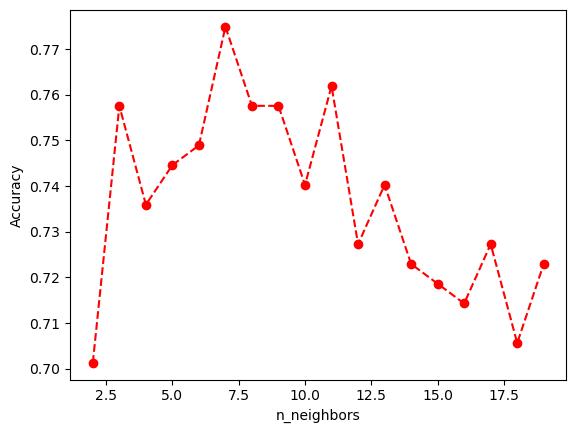

In [186]:
acc_scl = get_acc(X_train_scaled, y_train, X_test_scaled, y_test)

plt.plot(range(2, 20), acc_scl, marker='o', linestyle='--', color='r')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

Podemos apreciar como nuestro modelo es sensible al ruido hasta 7 vecinos, donde obtenemos el máximo accuracy. A partir de ahí, el accuracy empieza a bajar, ya que el modelo empieza a sobreajustarse a los datos de entrenamiento.

C:\Users\carde\AppData\Local\Temp\ipykernel_15196\856558834.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(acc_scl, hist=True, kde=False,


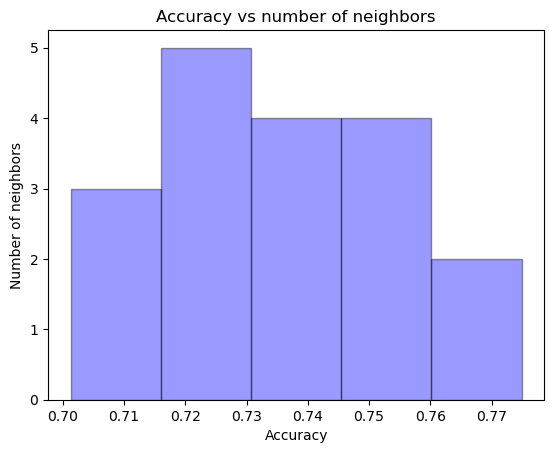

In [187]:
sns.distplot(acc_scl, hist=True, kde=False,
                bins=int(20/4), color = 'blue',
                hist_kws={'edgecolor':'black'})

plt.title('Accuracy vs number of neighbors')
plt.xlabel('Accuracy')
plt.ylabel('Number of neighbors')
plt.show()

Por último, mostramos una comparativa de los acc para cada número de vecinos, para los datos escalados y no escalados

n_neighbors: 19   Accuracy: 72.29
n_neighbors: 19   Accuracy: 76.62


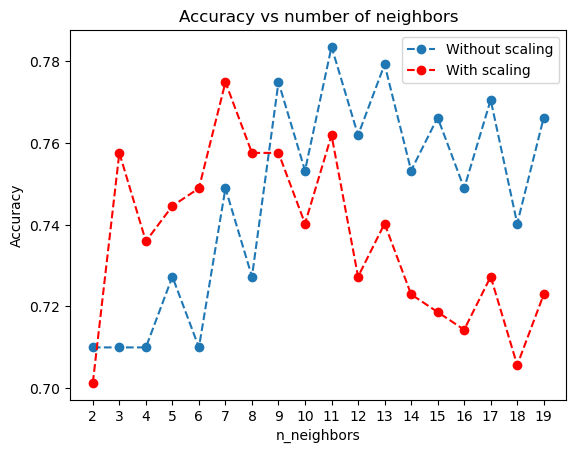

In [188]:
acc_scl = get_acc(X_train_scaled, y_train, X_test_scaled, y_test)
acc = get_acc(X_train, y_train, X_test, y_test)

plt.plot([i for i in range(2,20)], acc, 'o--')
plt.plot([i for i in range(2,20)], acc_scl, 'o--', color='red')
plt.xticks([i for i in range(2,20)])
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')

plt.legend(['Without scaling', 'With scaling'])
plt.title('Accuracy vs number of neighbors')
plt.show()

Como podemos ver, a medida que el número de vecinos aumenta, los accuracy de los datos escalados mejoran frente a los de datos no escalados a partir de un número de vecinos $x_0$ concreto. Luego, como existe un $x_0$ tal que para todo $x>x_0$ se cumple que $acc_{escalados}(x)>acc_{\text{no escalados}}(x)$, el accuracy de los datos escalados en función del número de vecinos supone una cota superior asíntotica del accuracy de los datos no escalados, al menos para este conjunto de datos.

### Estandarización (z-score)

[Documentación en scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)

¿Cuál es la precisión (accuracy) cuando se usa escalado? Compárala con la obtenida con los datos sin transformar (los originales, sin escalar)

Calcula la media y la desviación típica de los predictores originales y compáralos con los de los estandarizados. ¿Son los valores de estos últimos los que esperabas ver? ¿Porqué?

In [189]:
# evaluate knn on the diabetes dataset with minmax scaler transform
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# load the dataset
dataset = read_csv(datadir + 'pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

#### Datos sin escalar

##### Precisión (accuracy) cuando no se usa escalado

In [190]:
df = pd.DataFrame(columns=['Neighbors', 'Accuracy'])

# test model with different number of neighbors
for n_neighbors in range(2, 20):
    # create model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    # train it
    knn.fit(X_train, y_train)
    # predict on test set
    yhat = knn.predict(X_test)
    # evaluate predictions
    accuracy = accuracy_score(yhat, y_test)
    # print accuracy result
    df.loc[n_neighbors] = [n_neighbors, round(accuracy*100, 2)]
df['Neighbors'] = df['Neighbors'].astype(int)
df

,Neighbors,Accuracy
2,2,71.65
3,3,71.65
4,4,72.44
5,5,76.77
6,6,75.98
7,7,77.17
8,8,75.20
9,9,74.80
10,10,75.20
11,11,76.77


##### Calculo de la media y la desviación típica de los predictores sin escalar

In [191]:
# mean and standard deviation of predictors before scaling
df = pd.DataFrame(columns=['Variable', 'Mean', 'Standard Deviation'])
for i in range(X_train.shape[1]):
    df.loc[i] = [i, round(X_train[:, i].mean(), 2), round(X_train[:, i].std(), 2)]
df['Variable'] = df['Variable'].astype(int)
df

,Variable,Mean,Standard Deviation
0,0,3.710000,3.320000
1,1,121.349998,31.530001
2,2,69.059998,19.969999
3,3,19.480000,15.940000
4,4,77.449997,112.269997
5,5,31.910000,7.620000
6,6,0.470000,0.330000
7,7,33.340000,12.030000


#### Datos escalados

##### Precisión (accuracy) cuando se usa escalado

In [192]:
# define the scaler
std = StandardScaler()
# scale train and test sets
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

df = pd.DataFrame(columns=['Neighbors', 'Accuracy'])

# test model with different number of neighbors
for n_neighbors in range(2, 20):
    # create model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    # train it
    knn.fit(X_train_std, y_train)
    # predict on test set
    yhat = knn.predict(X_test_std)
    # evaluate predictions
    accuracy = accuracy_score(yhat, y_test)
    # print accuracy result
    df.loc[n_neighbors] = [n_neighbors, round(accuracy*100, 2)]
df['Neighbors'] = df['Neighbors'].astype(int)
df

,Neighbors,Accuracy
2,2,68.11
3,3,73.62
4,4,76.38
5,5,79.53
6,6,77.56
7,7,76.38
8,8,75.20
9,9,74.80
10,10,78.35
11,11,76.77


##### Calculo de la media y la desviación típica de los predictores escalados

In [193]:
# mean and standard deviation of predictors after scaling
df = pd.DataFrame(columns=['Variable', 'Mean', 'Standard Deviation'])
for i in range(X_train_std.shape[1]):
    df.loc[i] = [i, round(X_train_std[:, i].mean(), 2), round(X_train_std[:, i].std(), 2)]
df['Variable'] = df['Variable'].astype(int)
df

,Variable,Mean,Standard Deviation
0,0,0.0,1.0
1,1,0.0,1.0
2,2,0.0,1.0
3,3,-0.0,1.0
4,4,0.0,1.0
5,5,-0.0,1.0
6,6,0.0,1.0
7,7,0.0,1.0


##### Comparación precisión (accuracy) obtenida con los datos sin transformar y los transformados

In [194]:
def calculate_accuracy(X_train, X_test, y_train, y_test, n_neighbors):
    """
    Calculate the accuracy of a KNN model with a given number of neighbors.
    """
    # create model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    # train it
    knn.fit(X_train, y_train)
    # predict on test set
    yhat = knn.predict(X_test)
    # evaluate predictions
    accuracy = accuracy_score(yhat, y_test)
    return accuracy

In [195]:
def compare_models(X_train, X_test, y_test, funcs, knn_min=2, knn_max=20):
    """
    Compare the accuracy of different models

    Parameters
    ----------
    X_train : array-like
    X_test : array-like
    y_test : array-like
    funcs : list
    knn_min : int
    knn_max : int
    Returns DataFrame with the accuracy of each model
    """
    # create empty dictionary to store results
    value = {funcs[i]: [] for i in range(len(funcs))}

    for j in range(knn_min, knn_max):
        for i, f in enumerate(funcs):
            if f == 'Non-Scaled':
                # test model with different number of neighbors
                meassure = calculate_accuracy(X_train, X_test, y_train, y_test, j)
            if f == 'Scaled':
                # define the scaler
                std = StandardScaler()
                # scale train and test sets
                X_train_std = std.fit_transform(X_train)
                X_test_std = std.transform(X_test)
                # test model with different number of neighbors
                meassure = calculate_accuracy(X_train_std, X_test_std, y_train, y_test, j)
            value[f].append(meassure)

    return pd.DataFrame(value, index=[i + 1 for i in range(len(value[list(value.keys())[0]]))])

In [196]:
acc = compare_models(X_train, X_test, y_test, ["Non-Scaled", "Scaled"], 1, 20)

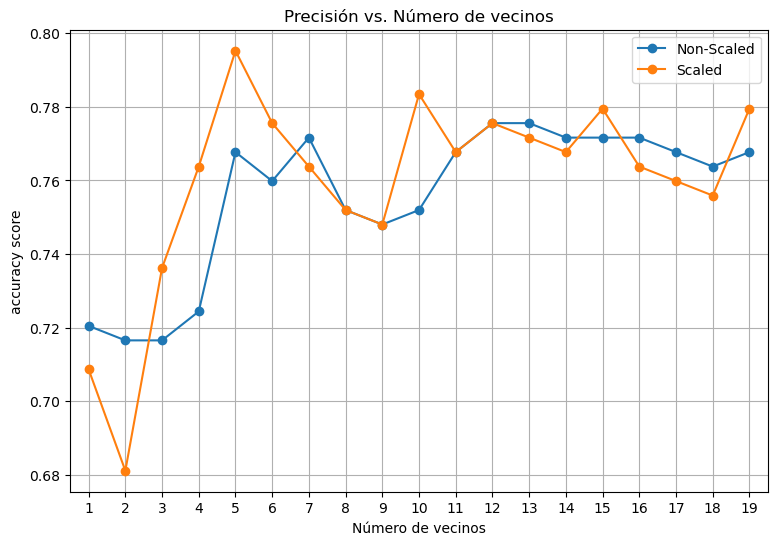

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Non-Scaled,72.05,71.65,71.65,72.44,76.77,75.98,77.17,75.2,74.8,75.20,76.77,77.56,77.56,77.17,77.17,77.17,76.77,76.38,76.77
Scaled,70.87,68.11,73.62,76.38,79.53,77.56,76.38,75.2,74.8,78.35,76.77,77.56,77.17,76.77,77.95,76.38,75.98,75.59,77.95


In [197]:
acc.plot(style='o-', grid=True, figsize=(9,6),
    xticks=range(len(acc) + 1),
    xlim = (0.5, len(acc) + 0.5),
    title='Precisión vs. Número de vecinos',
    xlabel='Número de vecinos',
    ylabel='accuracy score')
plt.show()
display((acc.transpose() * 100).round(2))

##### Comparación media y desviación estandar entre los valores no escalados y los valores escalados.

In [198]:
def compare_models_mean(funcs, X_train):
    # create empty dictionary to store results
    value = {funcs[i]: [] for i in range(len(funcs))}
    for i, f in enumerate(funcs):
        for j in range(X_train.shape[1]):
            if f == 'Non-Scaled':
                meassure = X_train[:, j].mean()
            if f == 'Scaled':
                std = StandardScaler()
                X_train_std = std.fit_transform(X_train)
                meassure = X_train_std[:, j].mean()
            value[f].append(meassure)

    return pd.DataFrame(value, index=[i + 1 for i in range(len(value[list(value.keys())[0]]))])

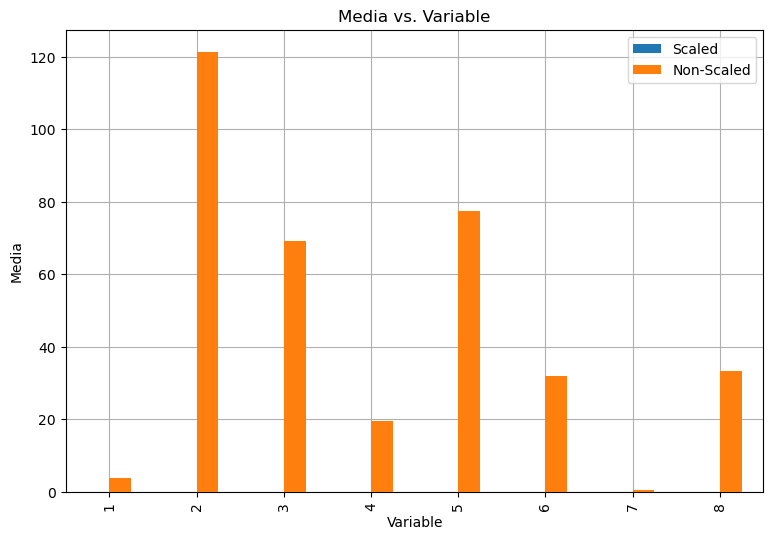

,1,2,3,4,5,6,7,8
Scaled,0.00,0.000000,0.000000,-0.00,0.000000,-0.00,0.00,0.00
Non-Scaled,3.71,121.349998,69.059998,19.48,77.449997,31.91,0.47,33.34


In [199]:
acc =  compare_models_mean(['Scaled', 'Non-Scaled'], X_train)
acc.plot(kind='bar',
        figsize=(9,6),
        xlim = (0.5, len(acc) + 0.5),
        title='Media vs. Variable',
        xlabel='Variable',
        ylabel='Media',
        zorder=3)
plt.grid(zorder=0)
plt.show()
display((acc.transpose()).round(2))

In [200]:
def compare_models_std(funcs, X_train):
    # create empty dictionary to store results
    value = {funcs[i]: [] for i in range(len(funcs))}
    for i, f in enumerate(funcs):
        for j in range(X_train.shape[1]):
            if f == 'Non-Scaled':
                meassure = X_train[:, j].std()
            if f == 'Scaled':
                std = StandardScaler()
                X_train_std = std.fit_transform(X_train)
                meassure = X_train_std[:, j].std()
            value[f].append(meassure)

    return pd.DataFrame(value, index=[i + 1 for i in range(len(value[list(value.keys())[0]]))])

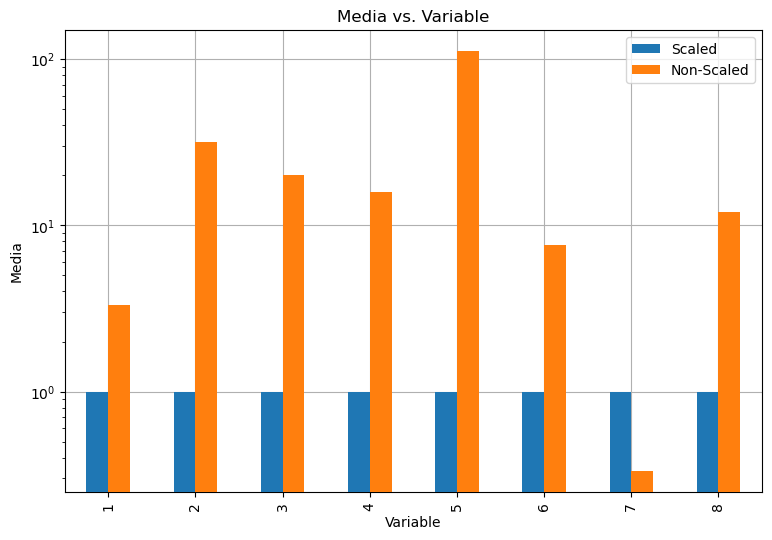

,1,2,3,4,5,6,7,8
Scaled,1.00,1.000000,1.000000,1.00,1.000000,1.00,1.00,1.00
Non-Scaled,3.32,31.530001,19.969999,15.94,112.269997,7.62,0.33,12.03


In [201]:
acc =  compare_models_std(['Scaled', 'Non-Scaled'], X_train)
acc.plot(kind='bar',
        figsize=(9,6),
        xlim = (0.5, len(acc) + 0.5),
        title='Media vs. Variable',
        xlabel='Variable',
        ylabel='Media',
        zorder=3,
        logy=True)
plt.grid(zorder=0)
plt.show()
display((acc.transpose()).round(2))

##### ¿Son los valores de estos últimos los que esperabas ver? ¿Porqué?